# K-CAP Assignment

### Below are the instructions for the assignment. Please read and follow them carefully.

1.   For doing the K-CAP project it is **mandatory** to complete the K-CAP assignment, based on which selections will be done.
1.   There are 3 parts in this assignment and **none** are optional.
2.   Answer/code for each question is to be written in the code cell following the question.
3.   **Do not** edit this notebook. Make a copy in your drive to solve the assignment.
3.   The csv files mentioned in the assignment, ```cepheids.csv``` and ```curves.csv``` can be downloaded and used from this [Drive link](https://drive.google.com/drive/folders/17DkvsU0GVGOnffZCsgkkp5A3SbQRTWQf?usp=sharing).
2.   Comment your code wherever needed.
3.   The resources that may be required for help and reference are uploaded on this [github repo](https://github.com/krittikaiitb/tutorials).
4.   The **deadline** for the assignment submission is **29th November 11.59 pm** and no further extension will be provided.
5.   Upload your notebook on Google Colab and share the link in this [google form](https://docs.google.com/forms/d/e/1FAIpQLSewj0UyD1a22d_GKOq-7_i9yWu40Az_x9s-rxJqVF-60_C9CA/viewform?usp=sharing) for submission.
6.   Make sure you have given access to submission file before submitting.

# All The Best!!


# Cepheid variables

Cepheid variables are a type of variable star that pulsate radially, varying in both diameter and temperature, which produces changes in brightness with a well-defined stable period and amplitude. These stars are significant in the field of astronomy for several reasons:

1. **Standard Candles**: Cepheids have a well-established relationship between their luminosity and pulsation period, known as the Leavitt law or period-luminosity relation. This makes them excellent standard candles for measuring astronomical distances.

2. **Distance Measurement**: By observing the period of a Cepheid's brightness variations, astronomers can determine its absolute magnitude. Comparing this with the apparent magnitude allows for the calculation of the distance to the star, which is crucial for mapping the scale of the universe.

3. **Galactic and Extragalactic Studies**: Cepheids are used to measure distances within our galaxy and to nearby galaxies. This helps in understanding the structure and scale of the Milky Way and the local group of galaxies.

4. **Historical Importance**: The discovery of Cepheids in the Andromeda galaxy by Edwin Hubble was pivotal in establishing that the universe is expanding, leading to the formulation of the Big Bang theory.

Cepheids continue to be a vital tool in modern astrophysics, aiding in the calibration of other distance measurement methods and contributing to our understanding of the cosmos.

# Part 1

The mechanism driving the pulsations of Cepheids involves complex interactions between radiation pressure, gas pressure, and opacity within the star's interior. Give a qualitative explanation of the thermal instability that leads to the pulsations in Cepheid variable stars, focusing on the role of the κ-mechanism (opacity mechanism).

Type your answer in this text cell. Double click the cell to edit.  
  
Here, the Greek letter kappa (κ) is used to indicate the radiative opacity at any particular depth of the stellar atmosphere. In a normal star, an increase in compression of the atmosphere causes an increase in temperature and density; this produces a decrease in the opacity of the atmosphere, allowing energy to escape more rapidly. The result is an equilibrium condition where temperature and pressure are maintained in a balance. However, in cases where the opacity increases with temperature, the atmosphere becomes unstable against pulsations. If a layer of a stellar atmosphere moves inward, it becomes denser and more opaque, causing heat flow to be checked. In return, this heat increase causes a build-up of pressure that pushes the layer back out again. The result is a cyclic process as the layer repeatedly moves inward and then is forced back out again.  
Ref: https://en.wikipedia.org/wiki/Kappa%E2%80%93mechanism

# Part 2

The data in ```cepheids.csv``` is organised in two columns: the period of the cepheid variable and its absolute magnitude calculated from mean luminosity.

These two values are actually related by the Leavitt law:
$$M = a \cdot \log_{10}{P} + b$$

First, find the constants $a$ and $b$ in this relation to fit the given data.

In [1]:
#Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data= pd.read_csv("./cepheids.csv")
data.describe() 

# sns.boxplot(data=data)
# plt.show()

# Remove outliers
data1=data[data['M']<-2.2]
data1=data1[data1['M']>-3.4]
# data1=data

X=np.log10(data1['Period']).values.reshape((-1,1))
y=np.array(data1['M'])

In [2]:
# Perform least square estimation on cleaned data
from sklearn.linear_model import LinearRegression

res = LinearRegression().fit(X, y)
a=res.coef_
b=res.intercept_
y_est=res.predict(X) 
print(res.score(X, y))


0.36130884445895406


Next, plot the data along with your fitted line to visually verify that you have found the correct constants.

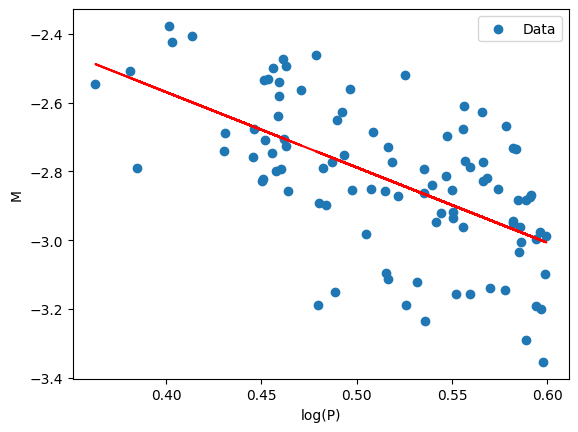

In [3]:
plt.scatter(X, y, label='Data')
plt.plot(X, y_est, color='red')
plt.xlabel("log(P)")
plt.ylabel("M")
plt.legend()
plt.show()

# Part 3

Now we are ready to use the result we have obtained from the above markdown to solve the problem.

Given in the ```curves.csv``` file is the data of the light curves of many cepheids in the line of sight of a galaxy. The data contains three columns: ID(Unique for every cepheid), JD (the julian date of observation) and the apparent magnitude observed.

First we need to find the period of each cepheid.

In [4]:
# Load the data
data2=pd.read_csv("curves.csv")
data2['ID'].value_counts()
# data2['rate']=np.zeros(len(data2))

# for i in range(len(data2)):
#     if i==0 or data2['ID'][i]!=data2['ID'][i-1]: 
#         # print("new\n")
#         data2['rate'][i]=10
#     else:
#         data2['rate'][i]= (data2['m'][i]-data2['m'][i-1])/(data2['JD'][i]-data2['JD'][i-1]) 
#         # rate at which brightness change per day

data2['rate'] = 10

# Identify rows where the ID changes
id_change = data2['ID'] != data2['ID'].shift()

# Calculate the rate for rows where ID does not change
rate_condition = ~id_change
data2.loc[rate_condition, 'rate'] = (
    (data2.loc[rate_condition, 'm'] - data2.loc[rate_condition, 'm'].shift()) /
    (data2.loc[rate_condition, 'JD'] - data2.loc[rate_condition, 'JD'].shift())
)

In [5]:
# Group the data by same ID
data_grouped=data2['ID'].value_counts(sort=False)
data_grouped=pd.DataFrame(data_grouped, columns=['count'])
data_grouped.reset_index(inplace=True)

# idx=-1
# for i in range(len(data2)):
#     if i==0 or data2['ID'][i]!=data2['ID'][i-1]:
#         idx+=1
#     if abs(data2['rate'][i]) < 0.02 :
#         data_grouped['count_zeros'][idx]+=1

# count number of times rate becomes zero, that is minima or maxima in brightness
data2['is_zero_rate'] = (abs(data2['rate']) < 0.02)
count_zeros = data2.groupby('ID')['is_zero_rate'].sum().reset_index(name='count_zeros')

# Merge the results
data_grouped = data2['ID'].value_counts(sort=False).reset_index()
data_grouped.columns = ['ID', 'count']
data_grouped = data_grouped.merge(count_zeros, on='ID')

# In one period, there is one maxima and one minima. So twice the rate becomes zero.
# Hence period ~= no. of observations/ 2* (no of times rate becomes zero)
data_grouped['period']=data_grouped['count']/(2*data_grouped['count_zeros'])
data_grouped

,ID,count,count_zeros,period
0,2434670,208,16,6.500000
1,2442608,252,13,9.692308
2,2443943,205,25,4.100000
3,2446727,179,10,8.950000
4,2447157,187,17,5.500000
...,...,...,...,...
970,832653,318,46,3.456522
971,2190690,353,86,2.052326
972,566046,355,62,2.862903
973,188335,413,87,2.373563


Next, using the calculated periods, find the absolute magnitude of these stars using the relation you found earlier.



In [6]:
data_grouped['logP']=np.log10(data_grouped['period'])
data_grouped['M']=a*data_grouped['logP']+b

Then, using the apparent magnitude data, find the distance to these cepheid variables.

m - M = -5 + 5 Log (d)   
d = 10^(m-M+5)/5

,ID,count,count_zeros,period,logP,M,m,d
0,2434670,208,16,6.500000,0.812913,-3.474004,22.073319,1.286662e+06
1,2442608,252,13,9.692308,0.986427,-3.854174,22.119716,1.565951e+06
2,2443943,205,25,4.100000,0.612784,-3.035518,21.317328,7.422826e+05
3,2446727,179,10,8.950000,0.951823,-3.778356,13.865486,3.378847e+04
4,2447157,187,17,5.500000,0.740363,-3.315044,21.555355,9.420628e+05
...,...,...,...,...,...,...,...,...
970,832653,318,46,3.456522,0.538639,-2.873066,20.137106,3.999765e+05
971,2190690,353,86,2.052326,0.312246,-2.377037,18.966206,1.856301e+05
972,566046,355,62,2.862903,0.456807,-2.693770,19.377212,2.595354e+05
973,188335,413,87,2.373563,0.375401,-2.515409,19.140732,2.144017e+05


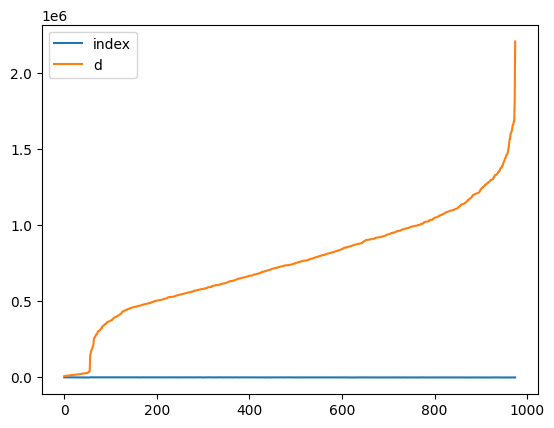

In [7]:
data_grouped['m']=data2.groupby('ID', sort=False)['m'].mean().reset_index()['m']
power=(data_grouped['m']-data_grouped['M']+5)/5
data_grouped['d']=10**power
data_grouped['d'].sort_values().reset_index().plot()
data_grouped

Finally, find the distance to the galaxy being observed.

There is a concentration of distances in the range 0.5 to 1.0 parsec